In [47]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d moazeldsokyx/dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators - to divide  big data in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
#Noramalise: to get pixel values 0 to 1 instead of 256x256 to et clear image
def process(iamge,label):
  image = tf.cast(iamge/255. , tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.mao(process)

In [ ]:
#build CNN MODEL
#layer 1 - 32 filters;       layer 2 - 64 filters ;   and layer3 - 128 filters

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 99s 144ms/step - loss: 1.1584 - accuracy: 0.6104 - val_loss: 0.8896 - val_accuracy: 0.6262
Epoch 2/10
625/625 [==============================] - 83s 132ms/step - loss: 0.5650 - accuracy: 0.7186 - val_loss: 0.5080 - val_accuracy: 0.7518
Epoch 3/10
625/625 [==============================] - 84s 134ms/step - loss: 0.4835 - accuracy: 0.7670 - val_loss: 0.4797 - val_accuracy: 0.7648
Epoch 4/10
625/625 [==============================] - 84s 134ms/step - loss: 0.4295 - accuracy: 0.8008 - val_loss: 0.5224 - val_accuracy: 0.7737
Epoch 5/10
625/625 [==============================] - 84s 134ms/step - loss: 0.3688 - accuracy: 0.8300 - val_loss: 0.3337 - val_accuracy: 0.8511
Epoch 6/10
625/625 [==============================] - 84s 135ms/step - loss: 0.3204 - accuracy: 0.8584 - val_loss: 0.3213 - val_accuracy: 0.8608
Epoch 7/10
625/625 [==============================] - 84s 134ms/step - loss: 0.2720 - accuracy: 0.8838 - val_loss: 0.2600 - val_ac

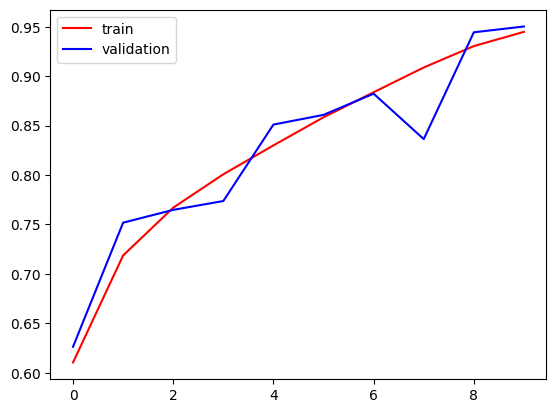

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

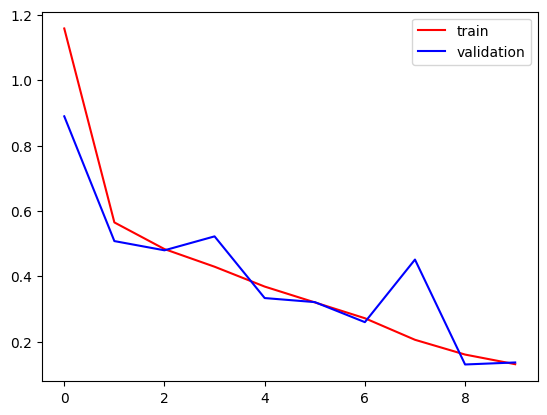

In [ ]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

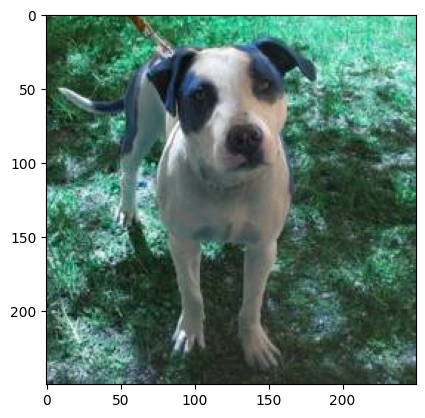

In [ ]:
import cv2

test_img = cv2.imread('/content/dataset/test/dogs/dog (1896).jpg')
plt.imshow(test_img)

plt.imshow(test_img)

In [ ]:
test_img.shape
(3000,2091,3)

test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))



In [ ]:
# Assuming your model predicts a binary output (0 or 1)
predicted_class = model.predict(test_input)

# Round the prediction to the nearest integer
rounded_prediction = int(round(predicted_class[0][0]))

# Define the class labels
class_labels = {0: "cat", 1: "dog"}

# Print "cat" if predicted value is 0, else print "dog"
if rounded_prediction in class_labels:
    print(class_labels[rounded_prediction])
else:
    print("Unknown class")





1/1 [==============================] - 0s 28ms/step
dog
